In [2]:
from scipy.stats import binom
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from gam_follow_up import config, plotting

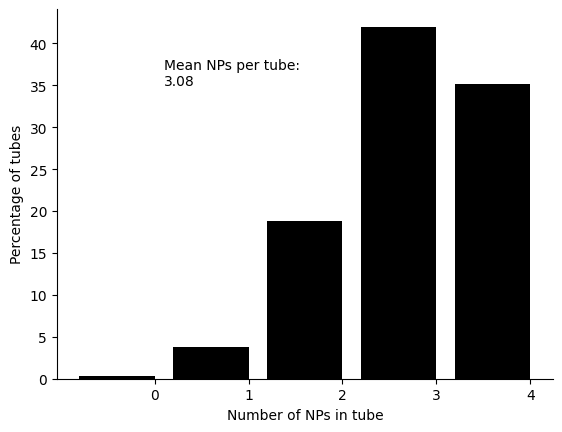

In [2]:
prob_section_no_nucleus = 0.77
num_sections_per_tube = 4

mean_nps_per_tube = binom.mean(num_sections_per_tube,
                               prob_section_no_nucleus)

plt.bar(range(num_sections_per_tube+1),
        100*binom.pmf(range(num_sections_per_tube+1), 
                      num_sections_per_tube,
                      prob_section_no_nucleus), color='black')

plt.ylabel('Percentage of tubes')
plt.xlabel('Number of NPs in tube')

plt.xticks(np.arange(5)+0.4, range(5))

plt.text(0.5, 35, 'Mean NPs per tube:\n{:.02f}'.format(mean_nps_per_tube))

plotting.simpleaxis()

# DNA Stain attempts

In [3]:
sample_statistics = pd.read_csv(
    config.in_data_raw('multiplex-gam-data/gamtools_output/merged_stats.txt'), sep='\t', index_col=0)

In [4]:
sample_statistics.expt.value_counts()

full-collection-4np          96
pi-staining-and-freezing     63
cresyl-violet-test           48
pk-volume-titration          42
wga-reagent-volumes          37
eosin-test                   35
sybrgold-test                30
large-vs-small-kit           28
freezing-after-incubation    26
early-freezing-test          26
wga-pcr-cycles-test          17
Name: expt, dtype: int64

In [6]:
sample_statistics.groupby(['expt', 'treatment']).filename.count()

expt                       treatment             
cresyl-violet-test         cresyl-violet             16
                           crystal-violet            16
                           none                       1
                           unstained                 15
early-freezing-test        frozen-early              13
                           frozen-late               13
eosin-test                 eosin-etoh                 8
                           eosin-h2o                  8
                           unstained                 19
freezing-after-incubation  frozen-post-incubation    13
                           unfrozen                  13
full-collection-4np        none                      96
large-vs-small-kit         large-kit                 13
                           small-kit                 15
pi-staining-and-freezing   pi_stained                21
                           pi_stained_frozen         21
                           unstained                 2

Text(0.5, 0, 'Percentage mapped reads')

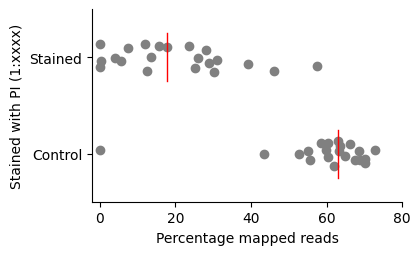

In [5]:
pi_stain_expt = sample_statistics[sample_statistics.expt == 'pi-staining-and-freezing']

pi_control = pi_stain_expt.loc[pi_stain_expt.treatment == 'unstained', 'Percent_mapped_reads'].values
pi_stain = pi_stain_expt.loc[pi_stain_expt.treatment == 'pi_stained', 'Percent_mapped_reads'].values

plt.figure(figsize=(4,2.5))
plotting.dotplot([pi_control, pi_stain], color='grey', horizontal=True, median=True)
plotting.simpleaxis()
plt.yticks([0,1], ['Control', 'Stained'])
plt.ylabel('Stained with PI (1:xxxx)')
plt.xlim(-2,80)
plt.ylim(-0.5, 1.5)
plt.xlabel('Percentage mapped reads')


Text(0.5, 0, 'Percentage mapped reads')

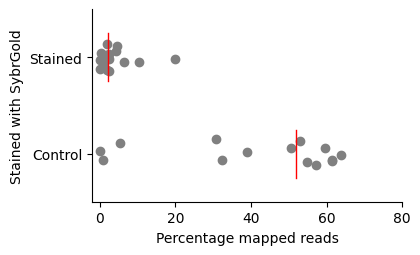

In [7]:
sybr_stain_expt = sample_statistics[sample_statistics.expt == 'sybrgold-test']

sybr_control = sybr_stain_expt.loc[sybr_stain_expt.treatment == 'unstained', 'Percent_mapped_reads'].values
sybr_stain = sybr_stain_expt.loc[sybr_stain_expt.treatment == 'stained-sybrgold', 'Percent_mapped_reads'].values

plt.figure(figsize=(4,2.5))
plotting.dotplot([sybr_control, sybr_stain], color='grey', horizontal=True)
plotting.simpleaxis()
plt.yticks([0,1], ['Control', 'Stained'])
plt.ylabel('Stained with SybrGold')
plt.xlim(-2,80)
plt.ylim(-0.5, 1.5)
plt.xlabel('Percentage mapped reads')

Text(0.5, 0, 'Percentage mapped reads')

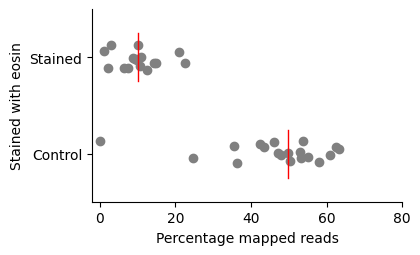

In [9]:
eosin_stain_expt = sample_statistics[sample_statistics.expt == 'eosin-test']

eosin_control = eosin_stain_expt.loc[eosin_stain_expt.treatment == 'unstained', 'Percent_mapped_reads'].values
eosin_stain = eosin_stain_expt.loc[eosin_stain_expt.treatment.isin(['eosin-etoh', 'eosin-h2o']),
                                  'Percent_mapped_reads'].values

plt.figure(figsize=(4,2.5))
plotting.dotplot([eosin_control, eosin_stain], color='grey', horizontal=True)
plotting.simpleaxis()
plt.yticks([0,1], ['Control', 'Stained'])
plt.ylabel('Stained with eosin')
plt.xlim(-2,80)
plt.ylim(-0.5, 1.5)
plt.xlabel('Percentage mapped reads')


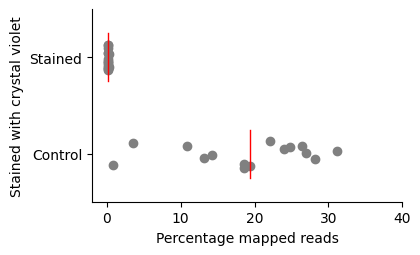

Text(0.5, 0, 'Percentage mapped reads')

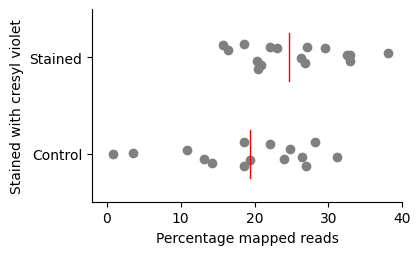

In [12]:
cresyl_stain_expt = sample_statistics[sample_statistics.expt == 'cresyl-violet-test']

crystal_control = cresyl_stain_expt.loc[cresyl_stain_expt.treatment == 'unstained', 'Percent_mapped_reads'].values
crystal_stain = cresyl_stain_expt.loc[cresyl_stain_expt.treatment == 'crystal-violet', 'Percent_mapped_reads'].values
cresyl_stain = cresyl_stain_expt.loc[cresyl_stain_expt.treatment == 'cresyl-violet', 'Percent_mapped_reads'].values

plt.figure(figsize=(4,2.5))
plotting.dotplot([crystal_control, crystal_stain], color='grey', horizontal=True)
plotting.simpleaxis()
plt.yticks([0,1], ['Control', 'Stained'])
plt.ylabel('Stained with crystal violet')
plt.xlim(-2,40)
plt.ylim(-0.5, 1.5)
plt.xlabel('Percentage mapped reads')
plt.show()


plt.figure(figsize=(4,2.5))
plotting.dotplot([crystal_control, cresyl_stain], color='grey', horizontal=True)
plotting.simpleaxis()
plt.yticks([0,1], ['Control', 'Stained'])
plt.ylabel('Stained with cresyl violet')
plt.xlim(-2,40)
plt.ylim(-0.5, 1.5)
plt.xlabel('Percentage mapped reads')

